In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
import statsmodels.api as sm
import geopandas as gpd
# import plotly.express as px
plt.style.use('seaborn-darkgrid')
pd.set_option("display.max_columns", None)

In [53]:
# !python.exe -m pip install --upgrade pip

In [54]:
df = pd.read_csv("DFC_FACILITY.csv", header=0)
df.columns = [c.lower() for c in df.columns.tolist()]
print(f"Tenemos un dataframe de {df.shape[0]} filas y {df.shape[1]} columnas")

Tenemos un dataframe de 7748 filas y 118 columnas


In [55]:
# Dado que son muchas columnas, con esta función, imprime de a n columnas para ver los primeros datos.
def analiza_columnas(df, n, indice=0):
    rango = range(n, len(df.columns), n)
    j=0
    for i in rango:
        display(df.iloc[[indice], j:i])
        j=i
    display(df.iloc[[indice], j:len(df)-j])

print('Utilizamos la función "analiza_columnas" para tener una primera impresión del dataset:')
display(analiza_columnas(df, 10))

Utilizamos la función "analiza_columnas" para tener una primera impresión del dataset:


,provider number,network,facility name,five star date,five star,five star data availability code,address line 1,address line 2,city,state
0,12306,8,CHILDRENS HOSPITAL DIALYSIS,01Jan2016-31Dec2019,NaN,260.0,1600 7TH AVENUE SOUTH,NaN,BIRMINGHAM,AL


,zip,county,phone number,profit or non-profit,chain owned,chain organization,late shift,# of dialysis stations,offers in-center hemodialysis,offers peritoneal dialysis
0,35233,Jefferson,(205) 638-9275,Non-profit,No,Independent,No,7,Yes,Yes


,offers home hemodialysis training,certification or recertification date,claims date,crownweb date,strr date,percentage of medicare patients with hgb<10 g/dl,hgb<10 data availability code,percentage of medicare patients with hgb>12 g/dl,hgb > 12 data availability code,number of dialysis patients with hgb data
0,Yes,11/17/1982,01JAN2021-31DEC2021,01JAN2021-31DEC2021,01Jan2021-31Dec2021,NaN,199.0,NaN,199.0,5.0


,patient transfusion data availability code,patient transfusion category text,number of patients included in the transfusion summary,percent of adult hd patients with kt/v >= 1.2,adult hd kt/v data availability code,percentage of adult pd pts with kt/v >= 1.7,adult pd kt/v data availability code,percentage of pediatric hd patients with kt/v >= 1.2,pediatric hd kt/v data availability code,number of adult hd patients with kt/v data
0,199.0,Not Available,2.0,NaN,201.0,NaN,199.0,98.0,1.0,0.0


,number of adult hd patient-months with kt/v data,number of adult pd patients with kt/v data,number of adult pd patient-months with kt/v data,number of pediatric hd patients with kt/v data,number of pediatric hd patient-months with kt/v data,hypercalcemia data availability code,number of patients in hypercalcemia summary,number of patient-months in hypercalcemia summary,percentage of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl),number of patients in serum phosphorus summary
0,NaN,1.0,2.0,15.0,99.0,199.0,1.0,1.0,NaN,1.0


,number of patient-months in serum phosphorus summary,serum phosphorus data availability code,percentage of adult patients with serum phosphorus less than 3.5 mg/dl,percentage of adult patients with serum phosphorus between 3.5-4.5 mg/dl,percentage of adult patients with serum phosphorus between 4.6-5.5 mg/dl,percentage of adult patients with serum phosphorus between 5.6-7.0 mg/dl,percentage of adult patients with serum phosphorus greater than 7.0 mg/dl,shr date,srr date,smr date
0,2.0,199.0,NaN,NaN,NaN,NaN,NaN,01Jan2021-31Dec2021,01Jan2021-31Dec2021,01Jan2018-31Dec2021


,patient hospitalization category text,patient hospitalization data availability code,patient hospital readmission category,patient hospital readmission data availability code,patient survival category text,patient survival data availability code,number of patients included in hospitalization summary,number of hospitalizations included in hospital readmission summary,number of patients included in survival summary,mortality rate (facility)
0,As Expected,1.0,As Expected,1.0,Not Available,199.0,9.0,12.0,49.0,NaN


,mortality rate: upper confidence limit (97.5%),mortality rate: lower confidence limit (2.5%),readmission rate (facility),readmission rate: upper confidence limit (97.5%),readmission rate: lower confidence limit (2.5%),hospitalization rate (facility),hospitalization rate: upper confidence limit (97.5%),hospitalization rate: lower confidence limit (2.5%),number of pediatric pd patients with kt/v data,pediatric pd kt/v data availability code
0,NaN,NaN,28.5,63.0,6.6,173.6,462.4,67.2,16.0,1.0


,number of pediatric pd patient-months with kt/v data,percentage of pediatric pd patients with kt/v>=1.8,sir date,patient infection data availability code,patient infection category text,standard infection ratio,sir: upper confidence limit (97.5%),sir: lower confidence limit (2.5%),transfusion rate (facility),transfusion rate: upper confidence limit (97.5%)
0,138.0,79.0,01Jan2021-31Dec2021,201.0,Not Available,NaN,NaN,NaN,NaN,NaN


,transfusion rate: lower confidence limit (2.5%),fistula data availability code,fistula category text,number of patients included in fistula summary,fistula rate (facility),fistula rate: upper confidence limit (97.5%),fistula rate: lower confidence limit (2.5%),number of patients in long term catheter summary,number of patient months in long term catheter summary,long term catheter data availability code
0,NaN,201.0,Not Available,0.0,NaN,NaN,NaN,0.0,NaN,201.0


,percentage of adult patients with long term catheter in use,number of patients in npcr summary,number of patient-months in npcr summary,npcr data availability code,percentage of pediatric hd patients with npcr,swr date,swr category text,patient transplant waitlist data availability code,95% c.i. (upper limit) for swr,95% c.i. (lower limit) for swr
0,NaN,20.0,164.0,1.0,91.0,01Jan2018-31Dec2020,As Expected,1.0,1.76,0.34


,number of patients in this facility for swr,standardized first kidney transplant waitlist ratio,pppw category text,patient prevalent transplant waitlist data availability code,95% c.i. (upper limit) for pppw,95% c.i. (lower limit) for pppw,number of patients for pppw,percentage of prevalent patients waitlisted
0,34.0,0.85,As Expected,1.0,49.4,8.4,38.0,23.0


None

In [56]:
data_availability_columns = df.columns[df.columns.to_series().str.contains("data availability")==True].tolist()[1:]
df = df[[c for c in df.columns.values.tolist() if c not in data_availability_columns]]
print("Dada la extensidad de columnas eliminamos las que no vamos a necesitar para trabajar el dataset.")
print(f"Esto nos deja un dataset con un total de {df.shape[1]} columnas.")

Dada la extensidad de columnas eliminamos las que no vamos a necesitar para trabajar el dataset.
Esto nos deja un dataset con un total de 100 columnas.


In [57]:
df = df[df['five star data availability code']==1.0]
print(f"Procedemos a eliminar las filas que indican que la información no está disponible.\n"
      f"En este caso, mantenemos las observaciones con un código igual a 1.0.")
print(f"Ahora tenemos un dataframe de {df.shape[0]} filas y {df.shape[1]} columnas.")

Procedemos a eliminar las filas que indican que la información no está disponible.
En este caso, mantenemos las observaciones con un código igual a 1.0.
Ahora tenemos un dataframe de 6731 filas y 100 columnas.


In [58]:
print("Eliminamos, en caso de existir, las calificaciones nulas.")
print("No se encontaron valores nulos" if df.dropna(subset=["five star"])["five star"].value_counts().sum() == df.shape[0] else
      f'Se encontaron {df.shape[0] - df.dropna(subset=["five star"])["five star"].value_counts().sum()} valores nulos.')

Eliminamos, en caso de existir, las calificaciones nulas.
No se encontaron valores nulos


In [59]:
print("Armamos un dataset agrupado por estado para analizar los datos de manera agregada.")
print('Alguno datos son símil booleanos con respuestas del tipo "yes" y "no".')
print("Primero creamos la función para cambiarlos.")

def count_yes(x):
    return (x == "Yes").sum()/ x.value_counts().sum()

print("Cargamos el dataset de estados con sus respectivos datos de gdp, población y superficie. Solo estados continentales.")
df_states_csv = pd.read_csv("usa_states_gdp.csv", header=0, sep=";").set_index("ab")[:-5]
df_states_agg = df.groupby("state").agg({"five star": "mean",
                                        "mortality rate (facility)": "mean",
                                        "# of dialysis stations": "mean",
                                        "offers in-center hemodialysis": lambda x: count_yes(x),
                                        "offers peritoneal dialysis": lambda x: count_yes(x),
                                        "offers home hemodialysis training": lambda x: count_yes(x),
                                        "percentage of medicare patients with hgb<10 g/dl": "mean",
                                        "percentage of medicare patients with hgb>12 g/dl": "mean",
                                        "percent of adult hd patients with kt/v >= 1.2": "mean",
                                        "percentage of adult pd pts with kt/v >= 1.7": "mean",
                                        "percentage of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl)": "mean",
                                        "percentage of adult patients with serum phosphorus less than 3.5 mg/dl": "mean",
                                        "percentage of adult patients with serum phosphorus between 3.5-4.5 mg/dl": "mean",
                                        "percentage of adult patients with serum phosphorus between 4.6-5.5 mg/dl": "mean",
                                        "percentage of adult patients with serum phosphorus between 5.6-7.0 mg/dl": "mean",
                                        "percentage of adult patients with serum phosphorus greater than 7.0 mg/dl": "mean",
                                        "readmission rate (facility)": "mean",
                                        "hospitalization rate (facility)": "mean",
                                        "standard infection ratio": "mean",
                                        "transfusion rate (facility)": "mean",
                                        "fistula rate (facility)": "mean",
                                        "percentage of adult patients with long term catheter in use": "mean",
                                        "number of patients in this facility for swr": "mean",
                                        "standardized first kidney transplant waitlist ratio": "mean",
                                        "number of patients for pppw": "mean",
                                        "percentage of prevalent patients waitlisted": "mean",
                                        "facility name": "count"
                                         })
df_states_agg = pd.merge(df_states_agg, df_states_csv, left_index=True, right_index=True)
df_states_agg["mortality ratio / hospitalization ratio"] = df_states_agg["mortality rate (facility)"] /\
                                                            df_states_agg["hospitalization rate (facility)"]
df_states_agg = df_states_agg.rename(columns={"facility name": "number of facilities"})
df_states_agg.columns = [c.replace("percentage", "%").replace(r"\([^()]*\)", "", True).replace("serum phosphorus", "serum PO4") 
                         for c in df_states_agg.columns]
# columnas_numericas = df_states_agg.select_dtypes(include='number').columns
# df_states_agg[columnas_numericas] = PowerTransformer().fit_transform(df_states_agg[columnas_numericas])
print("Vemos como queda el dataframe nuevo.")
display(df_states_agg.head(5))
display(f"Hay {df_states_agg.isna().sum().sum()} valores nulos")

Armamos un dataset agrupado por estado para analizar los datos de manera agregada.
Alguno datos son símil booleanos con respuestas del tipo "yes" y "no".
Primero creamos la función para cambiarlos.
Cargamos el dataset de estados con sus respectivos datos de gdp, población y superficie. Solo estados continentales.
Vemos como queda el dataframe nuevo.


,five star,mortality rate (facility),# of dialysis stations,offers in-center hemodialysis,offers peritoneal dialysis,offers home hemodialysis training,% of medicare patients with hgb<10 g/dl,% of medicare patients with hgb>12 g/dl,percent of adult hd patients with kt/v >= 1.2,% of adult pd pts with kt/v >= 1.7,% of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl),% of adult patients with serum PO4 less than 3.5 mg/dl,% of adult patients with serum PO4 between 3.5-4.5 mg/dl,% of adult patients with serum PO4 between 4.6-5.5 mg/dl,% of adult patients with serum PO4 between 5.6-7.0 mg/dl,% of adult patients with serum PO4 greater than 7.0 mg/dl,readmission rate (facility),hospitalization rate (facility),standard infection ratio,transfusion rate (facility),fistula rate (facility),% of adult patients with long term catheter in use,number of patients in this facility for swr,standardized first kidney transplant waitlist ratio,number of patients for pppw,% of prevalent patients waitlisted,number of facilities,state,population,total area,land area,real gdp,mortality ratio / hospitalization ratio
AK,4.777778,18.922222,17.777778,1.000000,0.666667,0.444444,22.000000,0.000000,98.000000,94.500000,0.777778,9.222222,24.444444,25.444444,23.000000,17.666667,22.385714,99.600000,0.477778,27.037500,72.122222,11.777778,34.333333,0.802500,77.111111,17.633333,9,Alaska,733391,1723337,570641,57349,0.189982
AL,3.843373,22.455422,17.126506,0.951807,0.379518,0.271084,19.714286,0.210884,97.220126,93.296296,1.222892,6.933735,21.379518,28.210843,23.927711,19.590361,24.774691,129.607229,0.338000,35.172143,53.709816,10.588957,28.331325,0.584028,58.969880,12.424699,166,Alabama,5024279,135767,50645,25411,0.173257
AR,3.446154,24.490769,17.584615,1.000000,0.492308,0.200000,21.879310,0.724138,96.562500,91.304348,1.828125,6.562500,19.937500,29.281250,23.015625,21.296875,26.571875,142.792308,0.356441,47.952632,57.990625,17.734375,41.830769,0.617692,77.738462,7.766129,65,Arkansas,3011524,137732,52035,148676,0.171513
AZ,3.973684,22.509649,18.833333,0.973684,0.385965,0.122807,18.884615,0.259615,97.144144,94.466667,1.166667,7.500000,22.456140,29.692982,22.771930,17.649123,25.553982,150.786842,0.354545,28.154000,66.797321,14.026786,42.912281,0.640000,86.078947,9.870175,114,Arizona,7151502,295234,113594,420027,0.149281
CA,3.734300,20.832528,21.673108,0.921095,0.487923,0.198068,15.963158,0.484211,96.834495,90.532407,1.988728,7.173139,23.582524,31.555016,21.770227,15.904531,26.411075,127.882068,0.413827,27.412500,64.971574,14.338409,41.655395,1.018076,94.668277,26.379871,621,California,39538223,423967,155779,3373241,0.162904


'Hay 0 valores nulos'

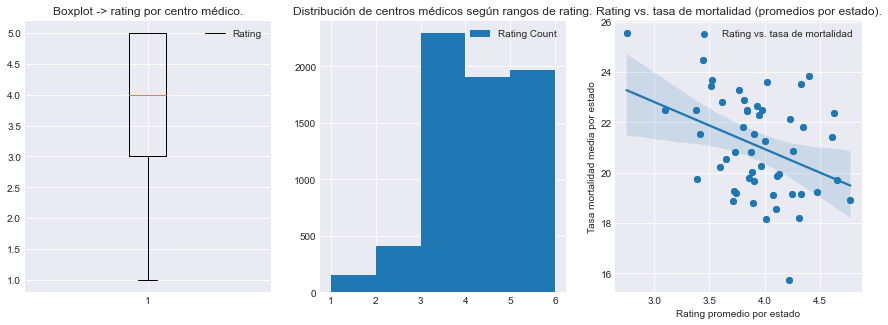

La clasificación promedio del dataset es de 3.8.
Se puede observar que un 92% de los centros médicos tienen una calificación mayor a 3.
El mayor número de centros médicos se encuentran en el bucket de calificación entre 3 y 4 puntos con un total de 2291.
En el gráfico de dispersión, se puede observar una relación entre la calificación del centro médico y la tasa de mortalidad.


<Figure size 432x288 with 0 Axes>

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.boxplot(df["five star"])
n, bins, patches = ax2.hist(df["five star"], bins=[1,2,3,4,5,6])
ax3.scatter(df_states_agg["five star"], df_states_agg["mortality rate (facility)"])
sns.regplot(x="five star", y="mortality rate (facility)",
            data=df_states_agg.loc[:, ["five star", "mortality rate (facility)"]],
            robust=True)     
ax1.legend(["Rating"])
ax2.legend(["Rating Count"])
ax3.legend(["Rating vs. tasa de mortalidad"])
for i in range(len(patches)):
    plt.annotate(str(int(n[i])), xy=(patches[i].get_x() + patches[i].get_width()/2, patches[i].get_height()), 
                 ha='center', va='bottom')
ax1.set_title("Boxplot -> rating por centro médico.")
ax2.set_title("Distribución de centros médicos según rangos de rating.")
ax3.set_title("Rating vs. tasa de mortalidad (promedios por estado).")
# ax1.set_xlabel("Distribución de ratings observados")
# ax2.set_xlabel("Rangos de rating")
ax3.set_xlabel("Rating promedio por estado")
ax3.set_ylabel("Tasa mortalidad media por estado")
plt.show()
plt.clf()

mean_rating = round(df["five star"].mean(), 1)
print(f"La clasificación promedio del dataset es de {mean_rating}.")
print(f"Se puede observar que un {sum(n[2:])/sum(n):.0%} de los centros médicos tienen una calificación mayor a {bins[2]}.\n"
        f"El mayor número de centros médicos se encuentran en el bucket de calificación entre {bins[2]} y {bins[3]} puntos "
        f"con un total de {n[2]:.0f}.")
print(f"En el gráfico de dispersión, se puede observar una relación entre la calificación del centro médico y la tasa de mortalidad.")

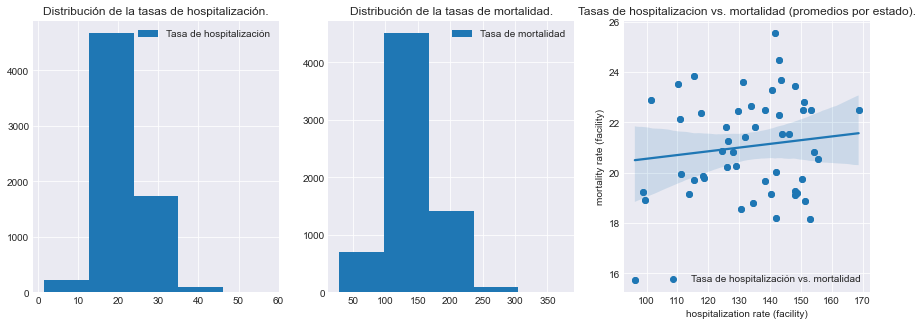

<Figure size 432x288 with 0 Axes>

In [61]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
n1, bins1, patches1 = ax1.hist(df["mortality rate (facility)"], bins=5)
# sns.FacetGrid(df, hue="mortality rate (facility)").map(sns.scatterplot()))
n2, bins2, patches2 = ax2.hist(df["hospitalization rate (facility)"], bins=5)
ax3.scatter(df_states_agg["hospitalization rate (facility)"], df_states_agg["mortality rate (facility)"])
sns.regplot(x="hospitalization rate (facility)", y="mortality rate (facility)",
            data=df_states_agg.loc[:, ["hospitalization rate (facility)", "mortality rate (facility)"]],
            robust=True)     
ax1.legend(["Tasa de hospitalización"])
ax2.legend(["Tasa de mortalidad"])
ax3.legend(["Tasa de hospitalización vs. mortalidad"])
for i in range(len(patches1)):
    plt.annotate(str(int(n1[i])), xy=(patches1[i].get_x() + patches1[i].get_width()/2, patches1[i].get_height()), 
                 ha='center', va='bottom')
for i in range(len(patches2)):
    plt.annotate(str(int(n2[i])), xy=(patches2[i].get_x() + patches2[i].get_width()/2, patches2[i].get_height()), 
                 ha='center', va='bottom')
ax1.set_title("Distribución de la tasas de hospitalización.")
ax2.set_title("Distribución de la tasas de mortalidad.")
ax3.set_title("Tasas de hospitalizacion vs. mortalidad (promedios por estado).")
# ax1.set_xlabel("Distribución de ratings observados")
# ax2.set_xlabel("Rangos de rating")
# ax3.set_xlabel("Rating promedio por estado")
# ax3.set_ylabel("Tasa mortalidad media por estado")
plt.show()
plt.clf()

In [72]:
fig = px.choropleth(df_states_agg, 
                    locations='state', 
                    locationmode='USA-states',
                    scope='usa', 
                    color='real gdp',
                    color_continuous_scale='reds',
                    range_color=(0, df_states_agg["real gdp"].max()),
                    labels={'gdp': 'real GDP Value'},
                    title='US GDP by State')

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

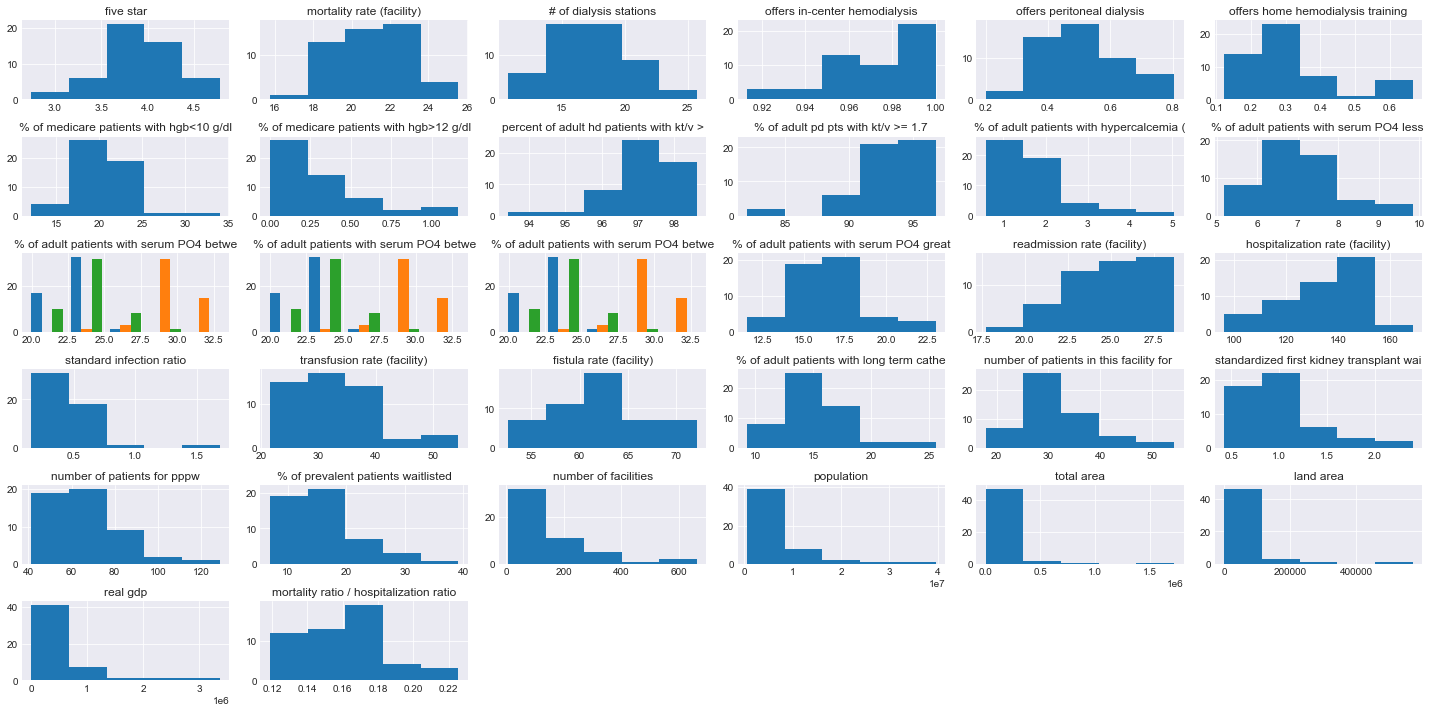

<Figure size 432x288 with 0 Axes>

In [62]:
df_states_agg.rename(columns={c: c[:40] for c in df_states_agg.columns}).hist(figsize=(20,10), bins=5)
plt.tight_layout()
plt.show()
plt.clf()

Para tener un mejor entendimiento de la dispersión de los valores para cada variable, escalo la información y hago un bxplot


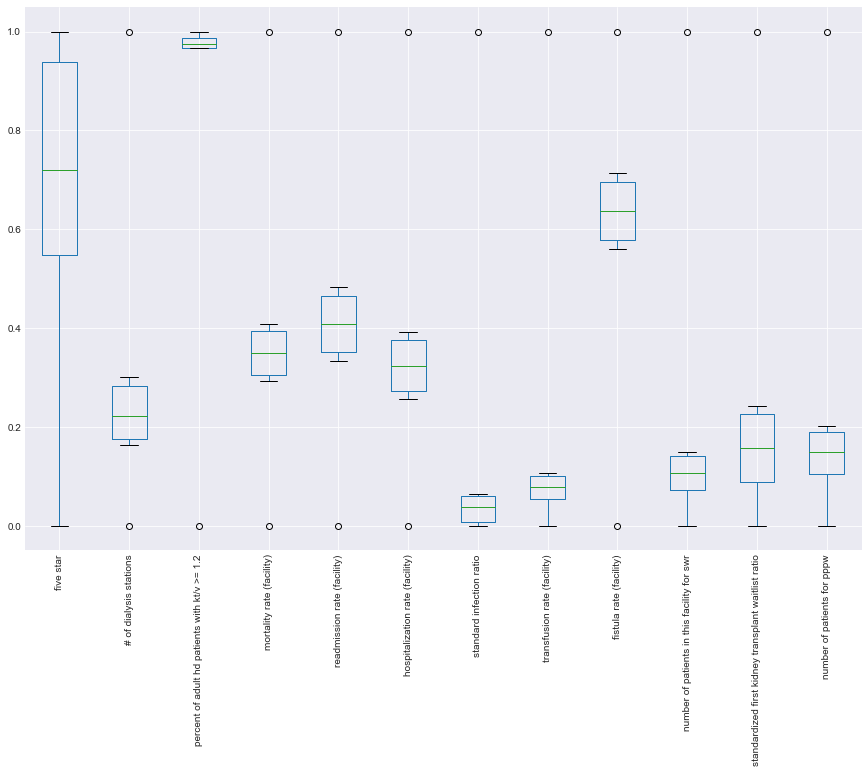

<Figure size 432x288 with 0 Axes>

In [63]:
print("Para tener un mejor entendimiento de la dispersión de los valores para cada variable, escalo la información y hago un boxplot.")
fig = plt.figure(figsize = (15,10))
df_describe = df[[c for c in df.columns if c in df_states_agg.columns]].describe()
mascara_index = ['mean','min', '25%', '50%', '75%', 'max']
df_desc_summ = df_describe.loc[mascara_index]
columnas_describe = df_desc_summ.columns
data = df_desc_summ.to_numpy()
data = MinMaxScaler().fit_transform(data)
df_desc_summ = pd.DataFrame(data=data, columns=columnas_describe)
df_desc_summ.boxplot()
plt.xticks(rotation=90)
plt.show()
plt.clf()

Creamos un matriz de correlaciones para las variables que estén fuertemente relacionadas.
Existen 5 variables correlacionadas (con un umbral de 0.8), que son las siguientes:
* % of adult patients with serum PO4 greater than 7.0 mg/dl
* number of patients for pppw
* population
* land area
* real gdp


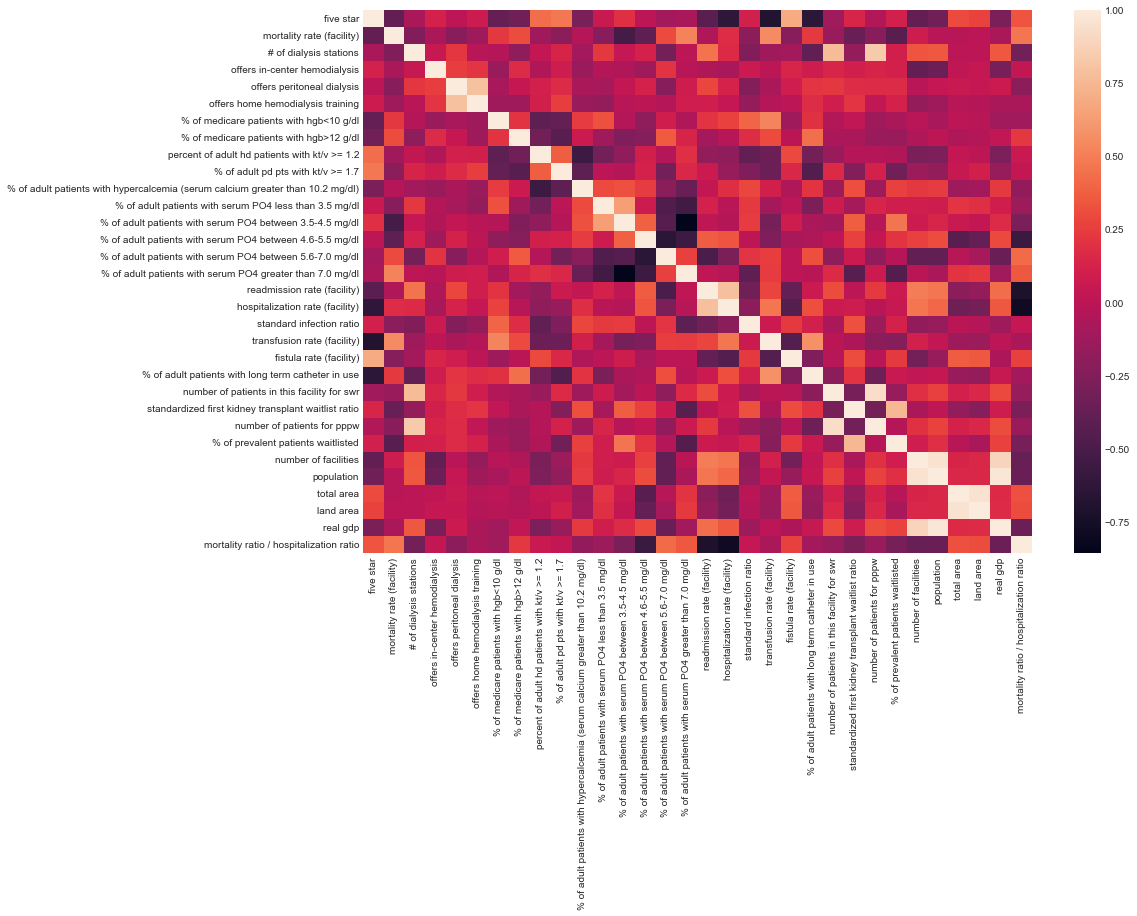

<Figure size 432x288 with 0 Axes>

In [67]:
print("Creamos un matriz de correlaciones para las variables que estén fuertemente relacionadas.")
plt.figure(figsize=(15, 10))
umbral = 0.8
df_corr = df_states_agg.corr()
sns.heatmap(df_corr)
columnas = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if abs(df_corr.iloc[i,j]) >= umbral:
            if columnas[j]:
                columnas[j] = False
columnas_correlacionadas = df_states_agg.drop(columns="state").columns[~columnas].values.tolist()
print(f"Existen {len(columnas_correlacionadas)} variables correlacionadas (con un umbral de {umbral}), que son las siguientes:")
for i in columnas_correlacionadas:
    print(f"* {i}")
plt.show()
plt.clf()
df_states_corr = df_states_agg.drop(columns="state").loc[:, columnas]

In [68]:
print("Buscamos")
X = df_states_corr.iloc[:, 1:]
X = sm.add_constant(X)
Y = df_states_corr.loc[:, "five star"]
modelo_reg = sm.OLS(Y, X).fit()
print(modelo_reg.summary())

Buscamos
                            OLS Regression Results                            
Dep. Variable:              five star   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     11.28
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           4.00e-08
Time:                        15:13:08   Log-Likelihood:                 40.855
No. Observations:                  51   AIC:                            -27.71
Df Residuals:                      24   BIC:                             24.45
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [66]:
print(f"There are {len(df_states_agg)} states with Medicare dialysis facilities")

print(f"NaN values per column: {df_states_agg.isna().sum().sum()}")

print("Top 10 states with the highest average rating:")
display(df_states_agg.sort_values(by="five star", ascending=False).head(10))

print("Top 10 states with the lowest average rating:")
display(df_states_agg.sort_values(by="five star", ascending=False).tail(10))

There are 51 states with Medicare dialysis facilities
NaN values per column: 0
Top 10 states with the highest average rating:


,five star,mortality rate (facility),# of dialysis stations,offers in-center hemodialysis,offers peritoneal dialysis,offers home hemodialysis training,% of medicare patients with hgb<10 g/dl,% of medicare patients with hgb>12 g/dl,percent of adult hd patients with kt/v >= 1.2,% of adult pd pts with kt/v >= 1.7,% of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl),% of adult patients with serum PO4 less than 3.5 mg/dl,% of adult patients with serum PO4 between 3.5-4.5 mg/dl,% of adult patients with serum PO4 between 4.6-5.5 mg/dl,% of adult patients with serum PO4 between 5.6-7.0 mg/dl,% of adult patients with serum PO4 greater than 7.0 mg/dl,readmission rate (facility),hospitalization rate (facility),standard infection ratio,transfusion rate (facility),fistula rate (facility),% of adult patients with long term catheter in use,number of patients in this facility for swr,standardized first kidney transplant waitlist ratio,number of patients for pppw,% of prevalent patients waitlisted,number of facilities,state,population,total area,land area,real gdp,mortality ratio / hospitalization ratio
AK,4.777778,18.922222,17.777778,1.000000,0.666667,0.444444,22.000000,0.000000,98.000000,94.500000,0.777778,9.222222,24.444444,25.444444,23.000000,17.666667,22.385714,99.600000,0.477778,27.037500,72.122222,11.777778,34.333333,0.802500,77.111111,17.633333,9,Alaska,733391,1723337,570641,57349,0.189982
CO,4.657534,19.731507,17.095890,0.986301,0.657534,0.342466,19.596774,0.548387,98.166667,92.656250,1.356164,7.082192,23.643836,30.150685,24.027397,15.082192,23.031429,115.247945,0.423143,25.287037,70.727397,12.438356,26.424658,1.183158,61.753425,20.508219,73,Colorado,5773714,269601,103642,436359,0.171209
UT,4.627907,22.381395,14.953488,0.953488,0.395349,0.255814,19.586207,1.034483,97.268293,90.928571,1.372093,6.790698,22.302326,27.790698,25.604651,17.465116,20.658333,117.776744,0.546957,25.735484,69.695238,13.119048,23.558140,1.031905,52.953488,12.137209,43,Utah,3271616,219882,8217,22534,0.190032
KS,4.611111,21.403704,16.092593,1.000000,0.444444,0.296296,17.021277,0.404255,98.592593,95.863636,1.370370,6.944444,21.629630,32.259259,21.296296,17.759259,23.001923,131.868519,0.523462,27.608696,70.620370,9.314815,27.944444,0.826087,55.018519,9.415385,54,Kansas,2937880,2131,81759,191381,0.162311
ME,4.473684,19.215789,14.894737,1.000000,0.631579,0.578947,15.352941,0.117647,97.631579,96.333333,0.894737,6.157895,22.631579,31.578947,23.526316,15.894737,21.489474,98.968421,0.423158,24.264706,63.747368,14.894737,30.210526,1.535714,60.157895,19.615789,19,Maine,1362359,91633,30843,77963,0.194161
WY,4.400000,23.860000,11.100000,1.000000,0.200000,0.200000,13.000000,0.000000,95.600000,94.000000,1.700000,7.300000,25.100000,26.900000,25.600000,15.300000,20.757143,115.490000,0.484000,31.166667,61.840000,15.100000,19.800000,0.950000,41.300000,17.490000,10,Wyoming,576851,253335,97093,4151,0.206598
IA,4.350000,21.821667,13.716667,1.000000,0.400000,0.166667,18.187500,0.125000,98.216667,95.333333,1.900000,6.150000,22.666667,31.716667,24.300000,14.966667,23.745283,125.691667,0.474545,35.263636,64.171667,17.116667,21.433333,1.400476,42.333333,13.726316,60,Iowa,3190369,145746,55857,21686,0.173613
ID,4.333333,23.548148,14.259259,0.962963,0.777778,0.666667,18.461538,0.346154,98.307692,96.785714,1.407407,6.740741,22.888889,28.777778,23.222222,18.333333,22.773077,110.140741,0.422174,26.407692,65.692308,14.807692,26.851852,1.215556,56.259259,12.248148,27,Idaho,1839106,216443,82643,96283,0.213801
OR,4.333333,19.174194,16.349206,0.952381,0.428571,0.253968,19.200000,0.200000,97.677966,95.428571,1.080645,6.000000,22.548387,29.983871,24.709677,16.725806,23.758333,113.703175,0.242712,22.818868,62.350000,13.100000,33.253968,0.736389,71.809524,11.138710,63,Oregon,4237256,254799,95988,272191,0.168634
CT,4.311111,18.195556,21.555556,1.000000,0.755556,0.577778,17.488372,0.186047,96.622222,96.040000,3.133333,7.681818,24.022727,33.204545,21.840909,13.363636,27.133333,141.

Top 10 states with the lowest average rating:


,five star,mortality rate (facility),# of dialysis stations,offers in-center hemodialysis,offers peritoneal dialysis,offers home hemodialysis training,% of medicare patients with hgb<10 g/dl,% of medicare patients with hgb>12 g/dl,percent of adult hd patients with kt/v >= 1.2,% of adult pd pts with kt/v >= 1.7,% of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl),% of adult patients with serum PO4 less than 3.5 mg/dl,% of adult patients with serum PO4 between 3.5-4.5 mg/dl,% of adult patients with serum PO4 between 4.6-5.5 mg/dl,% of adult patients with serum PO4 between 5.6-7.0 mg/dl,% of adult patients with serum PO4 greater than 7.0 mg/dl,readmission rate (facility),hospitalization rate (facility),standard infection ratio,transfusion rate (facility),fistula rate (facility),% of adult patients with long term catheter in use,number of patients in this facility for swr,standardized first kidney transplant waitlist ratio,number of patients for pppw,% of prevalent patients waitlisted,number of facilities,state,population,total area,land area,real gdp,mortality ratio / hospitalization ratio
TX,3.613293,22.806061,19.983384,0.975831,0.436556,0.154079,20.473862,0.344013,96.304954,91.706422,2.254545,6.827011,21.965099,29.766313,22.833080,18.619120,25.955963,150.981032,0.360816,35.339092,60.106442,14.503067,36.682779,0.884946,79.022659,15.335205,662,Texas,29145505,695662,261232,2051769,0.151052
MD,3.598684,20.248684,18.480263,0.960526,0.532895,0.197368,22.986207,0.151724,96.564626,84.243902,3.618421,7.726667,23.933333,31.093333,21.673333,15.580000,24.015436,125.944737,0.379065,29.380282,57.388514,17.013514,27.177632,1.047831,63.473684,19.347552,152,Maryland,6177224,32131,9707,44393,0.160774
TN,3.522727,23.688068,18.977273,0.954545,0.454545,0.295455,20.926380,0.177914,96.969880,93.781818,1.170455,6.488636,20.511364,27.948864,25.414773,19.642045,26.176000,143.527273,0.382761,38.836538,59.980571,17.034286,31.744318,0.913571,63.551136,16.324571,176,Tennessee,6910840,109153,41235,427125,0.165042
GA,3.518519,23.436728,17.919753,0.962963,0.577160,0.333333,21.790941,0.386760,96.003236,92.376068,2.436137,7.819315,22.772586,29.411215,23.021807,17.040498,26.539375,147.969659,0.356856,35.810036,56.542089,13.537975,27.654321,0.778824,65.882716,15.512773,324,Georgia,10711908,15391,57513,691627,0.158389
AR,3.446154,24.490769,17.584615,1.000000,0.492308,0.200000,21.879310,0.724138,96.562500,91.304348,1.828125,6.562500,19.937500,29.281250,23.015625,21.296875,26.571875,142.792308,0.356441,47.952632,57.990625,17.734375,41.830769,0.617692,77.738462,7.766129,65,Arkansas,3011524,137732,52035,148676,0.171513
NV,3.416667,21.560417,21.104167,1.000000,0.541667,0.291667,19.829787,0.531915,96.687500,93.733333,1.687500,6.020833,21.937500,30.875000,23.145833,18.062500,27.004255,146.295833,0.310870,28.778723,60.383333,15.500000,47.708333,0.427895,108.458333,11.487500,48,Nevada,3104614,28638,109781,194487,0.147375
NY,3.388889,19.747038,20.281250,0.989583,0.472222,0.322917,23.162162,0.567568,94.498233,88.578313,3.643357,8.678445,24.770318,29.840989,23.084806,13.579505,27.947163,150.280634,0.483071,40.422568,64.141608,18.080420,40.048611,1.611383,80.465278,23.483214,288,New York,20201249,141297,47126,1901297,0.131401
FL,3.374429,22.504110,18.413242,0.970320,0.625571,0.317352,22.210396,0.225248,95.776190,93.070588,3.249428,6.822989,23.671264,31.871264,21.829885,15.772414,28.682989,168.740183,0.421620,39.657105,56.175694,18.192130,33.426941,0.790500,70.321918,13.405069,438,Florida,21538187,170312,53625,1255558,0.133365
WV,3.097561,22.482927,16.609756,0.975610,0.804878,0.609756,24.852941,0.529412,96.775000,95.789474,1.536585,7.195122,23.170732,28.658537,23.780488,17.170732,25.065854,153.300000,0.303500,54.421212,58.187805,22.804878,35.536585,1.022941,56.731707,8.670732,41,West Virginia,1793716,62756,24038,85434,0.146660
VT,2.750000,25.562500,10.750000,1.000000,0.375000,0.250000,22.333333,1.166667,97.428571,82.000000,1.714286,5.857143,21.428571,28